---
<a name="comparison"></a>
# Comparison Renko

#### The data we'll use is the CFD of 2 assets: **EURGBP** and **US30**, both extracted directly from *cTrader (Price Provider: ICmarkets*) using utilities *(cBots and Indicators)* found on the **[site itself](https://ctrader.com/algos/indicators)**.

The file nomenclatures follow the following logic:
- `Re50`: 50 Renko pips.
- `T1`: 1 Tick.
- `ReW50`: 50 Renko Wicks pips.

**For the Volume and Wicks data**, 2 indicators were used *([Renko Wicks](https://ctrader.com/algos/indicators/show/3046),[Volume to Renko/Range](https://ctrader.com/algos/indicators/show/3045))* that I developed for cTrader some time ago, since we don't have these implementations natively at the moment.

## Non-Affiliation Disclaimer
I'm not endorsed by, directly affiliated with, maintained, authorized, or sponsored by any company previously mentioned. 
All product and company names are the registered trademarks of their original owners. 
The use of any trade name or trademark is for identification and reference purposes only and does not imply any association with the trademark holder of their product brand.

---

### We'll start with the lightest chart with visible renkos.

In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
import mplfinance as mpf

from renkodf import Renko

#### Let's load the Renko/1-Tick cTrader's data

In [3]:
df_orig = pd.read_parquet('examples/data/EURGBP_Re3_cT.parquet')
df_ticks = pd.read_parquet('examples/data/EURGBP_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

#### Now we'll create our Renko chart with renkowicks.py

In [4]:
r = Renko(df_ticks, brick_size=0.0003)
df_renko = r.renko_df('normal')

 100.0%

#### Initial thoghts

In [5]:
df_orig.head(4)
df_renko.head(4)
df_ticks.index[0]

,open,high,low,close,volume
datetime,,,,,
2023-06-22 21:06:56,0.8595,0.8598,0.8595,0.8598,4593
2023-06-23 01:21:58,0.8598,0.8601,0.8598,0.8601,571
2023-06-23 01:33:24,0.8601,0.8604,0.8601,0.8604,4993
2023-06-23 03:18:30,0.8604,0.8607,0.8604,0.8607,3358


,open,high,low,close,volume
datetime,,,,,
2023-06-23 01:21:58.333,0.8595,0.8598,0.8595,0.8598,3458.0
2023-06-23 01:33:24.996,0.8598,0.8601,0.8598,0.8601,571.0
2023-06-23 03:18:30.345,0.8601,0.8604,0.8601,0.8604,4993.0
2023-06-23 04:40:26.851,0.8604,0.8607,0.8604,0.8607,3358.0


Timestamp('2023-06-23 00:00:00.335000')

--- 
As we can see, there is a
- 1º **Little difference in datetime** similar to a pandas `shift(1)`.
- 2º **Different volume on the first row** of both dfs.

#### Why?
**1º** In Renko cTrader's data, the datetime displayed is the OpenTime of bars, and since; <br>
*the CloseTime of a bar is the OpenTime of next bar.* <br>
So, what we see in *'df_renko'* is the CloseTime of the bar.

**2º** Our **1-Tick's data starts at '*2023-06-23 00:00:00*'** and Renko Single Data is formed from there. <br>
While the formation of **first bar on *'df_orig'* started at '*2023-06-22 21:06:56*'**<br>in this case, the lack of 1145 ticks does not affect the price value.

---
#### Plotting to see if there is a significant visible difference

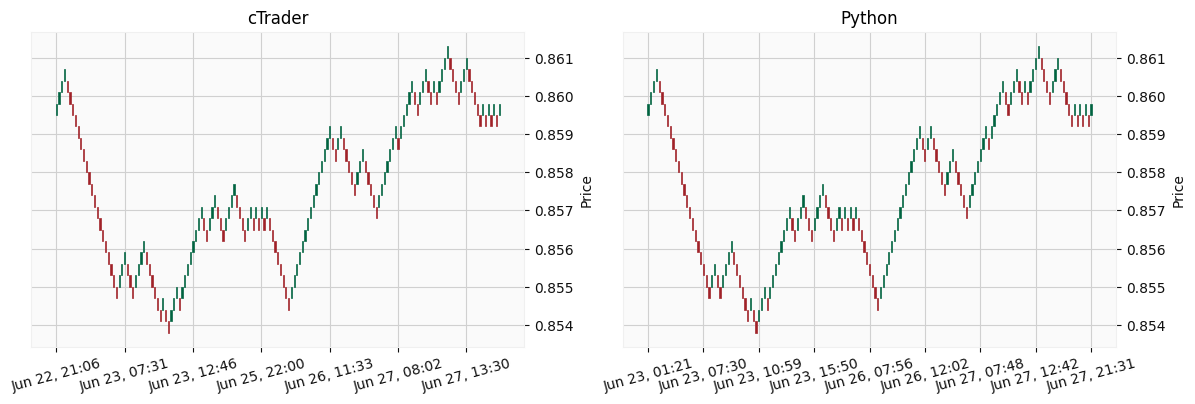

In [6]:
fig = mpf.figure(figsize=(14,9))
ax1 = fig.add_subplot(2,2,1,style='yahoo')
ax2 = fig.add_subplot(2,2,2,style='yahoo')
mpf.plot(df_orig, type='candle', style='charles', ax=ax1, axtitle='cTrader',xrotation=15, warn_too_much_data=len(df_orig['close']))
mpf.plot(df_renko, type='candle', style='charles', ax=ax2, axtitle='Python',xrotation=15, warn_too_much_data=len(df_renko['close']))
mpf.show()

#### Let's try another approach

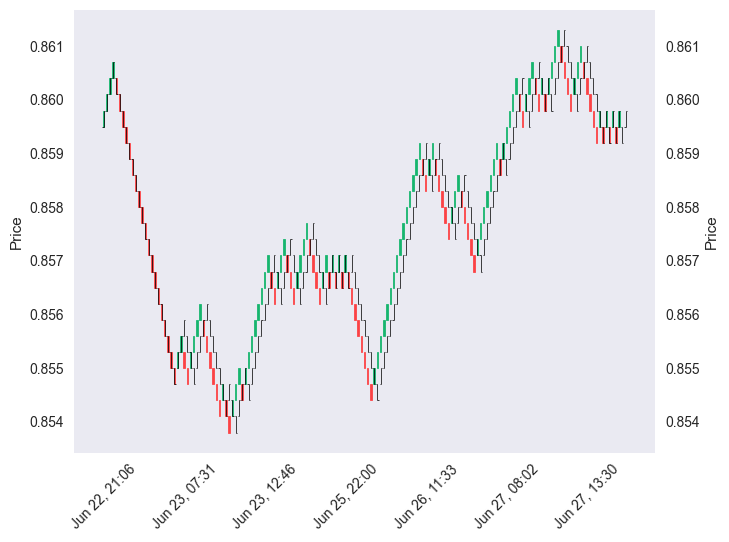

In [7]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_renko, ax=ax1, type='candle', style='yahoo')
mpf.plot(df_orig, ax=ax2, type='ohlc', style='default')

mpf.show()

#### There it is! it's visible that both dataframes start equal and at a certain point of price there is a difference.
From the image we know where the diff starts, but we need numbers and indicators!
### First, how many renkos do we have of difference?

In [8]:
len(df_renko)
len(df_orig)
abs(len(df_renko) - len(df_orig))

161

163

2

### Before we continue, a note must be made for **prices with 2-5 digits.**
Sometimes this can happen, see:

In [9]:
# let's see how the OHLC values are being displayed in pandas
df_renko.head(1)

# But what if we access each row value of each column?
for name in df_renko.columns:
    print(f"{name}: {df_renko[name][0]}")
    
# So, taking the value of df_renko's 'close', is it equal to the first 'close' of df_orig?
print(f"\ndf_renko: {df_renko['close'][0]} | df_orig: {df_orig['close'][0]} | is equal? {df_renko['close'][0] == df_orig['close'][0]}")
print(f"with round(x, 5): {round(df_renko['close'][0], 5)} | df_orig: {df_orig['close'][0]} | is equal? {round(df_renko['close'][0], 5) == df_orig['close'][0]}")

,open,high,low,close,volume
datetime,,,,,
2023-06-23 01:21:58.333,0.8595,0.8598,0.8595,0.8598,3458.0


open: 0.8594999999999999
high: 0.8597999999999999
low: 0.8594999999999999
close: 0.8597999999999999
volume: 3458.0

df_renko: 0.8597999999999999 | df_orig: 0.8598 | is equal? False
with round(x, 5): 0.8598 | df_orig: 0.8598 | is equal? True


#### As we only need the *'close'* column, in this specific case, we will pass *round(x, 5)* through this entire column.

In [10]:
df_renko['close'] = df_renko['close'].apply(lambda x: round(x, 5))

### Finally, time to see where the differences are.

In [11]:
def get_differences(df1, df2):
    differs_df1 = []
    differs_df2 = []
    diff_count = 0
    for i in range(len(df1)):
        if i >= len(df2['close']) or len(differs_df1) >= abs(len(df1) - len(df2)):
            continue
        if diff_count == 0:
            if df1['close'][i] != df2['close'][i]:
                differs_df1.append(df1.index[i])
                differs_df2.append(df2.index[i])
                diff_count = 1
        else:
            if df1.shift(diff_count)['close'][i] != df2['close'][i]:
                differs_df1.append(df1.index[i])
                differs_df2.append(df2.index[i])
                diff_count = diff_count + 1
    return [differs_df1, differs_df2]

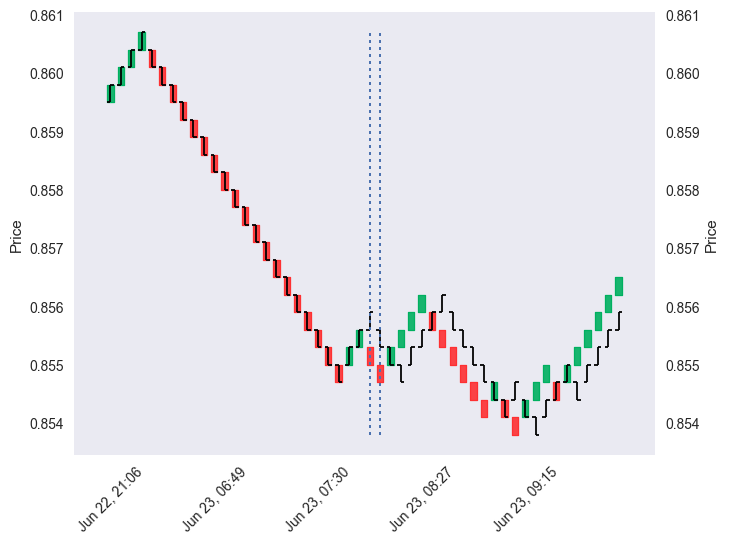

In [12]:
# as df_orig's len() is greater than df_renko,
# we should use it to remove and plot the differs based on it
differs = get_differences(df_orig, df_renko)[0]

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_renko.iloc[:50], ax=ax1, type='candle', style='yahoo')
mpf.plot(df_orig.iloc[:50], ax=ax2, type='ohlc', vlines=dict(vlines=differs, linestyle='dotted'), style='default')

mpf.show()

#### Good, now we want to see if removing these differences will make everything harmonious.
#### **NOTE:** Remembering that, in this case, we are removing bricks from *'df_orig'*, which is our **validation medium.**
## This is just to illustrate that despite the possible occurrence of more/less bricks, the renko calculation used is practically the same, or very approximate.

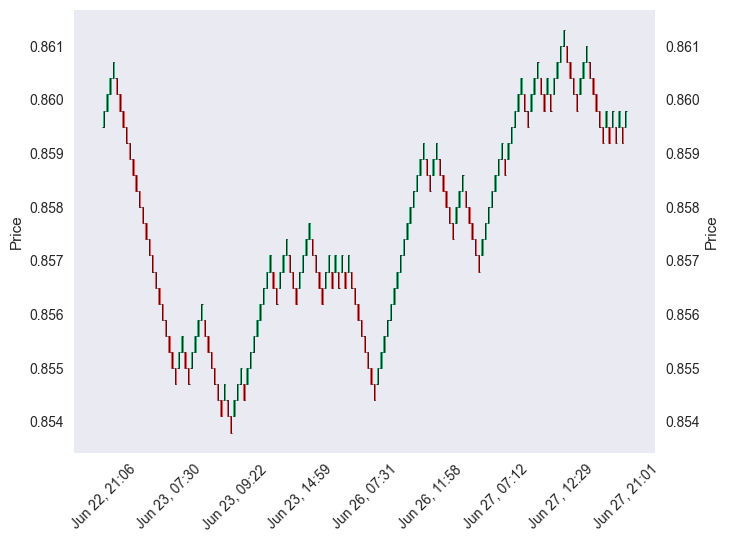

In [13]:
new_orig = df_orig.drop(differs)
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_renko, ax=ax1, type='candle', style='yahoo')
mpf.plot(new_orig, ax=ax2, type='ohlc', style='default')

mpf.show()

### Wonderful! Let's go to the last example.

In [14]:
df_orig = pd.read_parquet('examples/data/US30_Re50_cT.parquet')
df_ticks = pd.read_parquet('examples/data/US30_T1_cT.parquet')
df_ticks.rename(columns={'bid': 'close'}, inplace=True)

r = Renko(df_ticks, brick_size=5)
df_renko = r.renko_df('normal')

 100.0%

In [15]:
len(df_renko)
len(df_orig)
abs(len(df_renko) - len(df_orig))

693

679

14

14


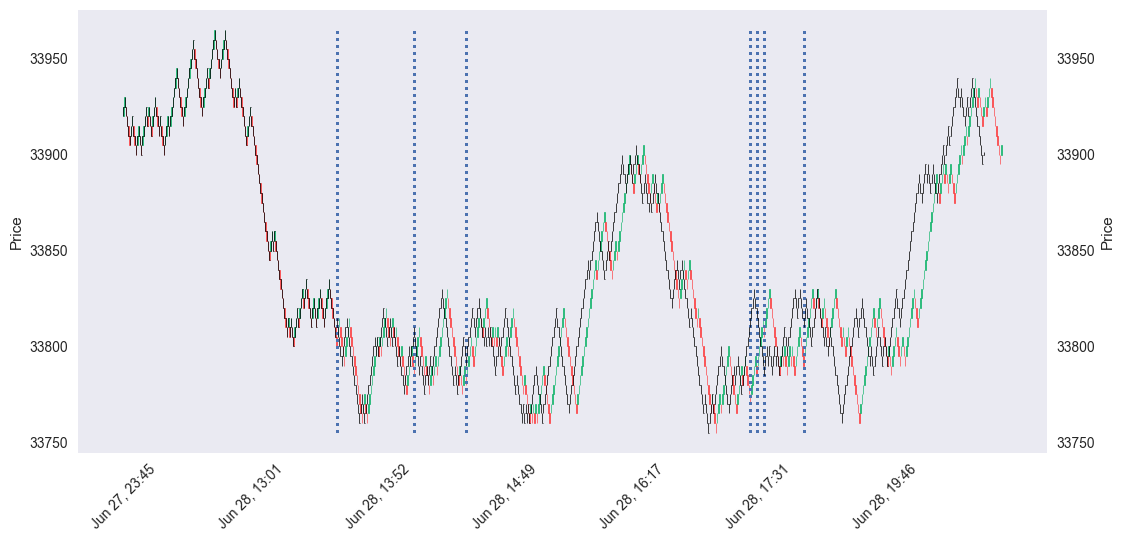

In [16]:
# as df_renko's len() is greater than df_orig,
# we should use it to remove and plot the differs based on it
differs = get_differences(df_orig, df_renko)[1]
print(len(differs))

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(12.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(df_renko, ax=ax1, type='candle', vlines=dict(vlines=differs, linestyle='dotted'), style='yahoo', warn_too_much_data=len(df_renko))
mpf.plot(df_orig, ax=ax2, type='ohlc', style='default', warn_too_much_data=len(df_renko))

mpf.show()

#### Let's remove the current differs and see if there are still others.
**NOTE:** We are removing bricks from 'df_renko'.

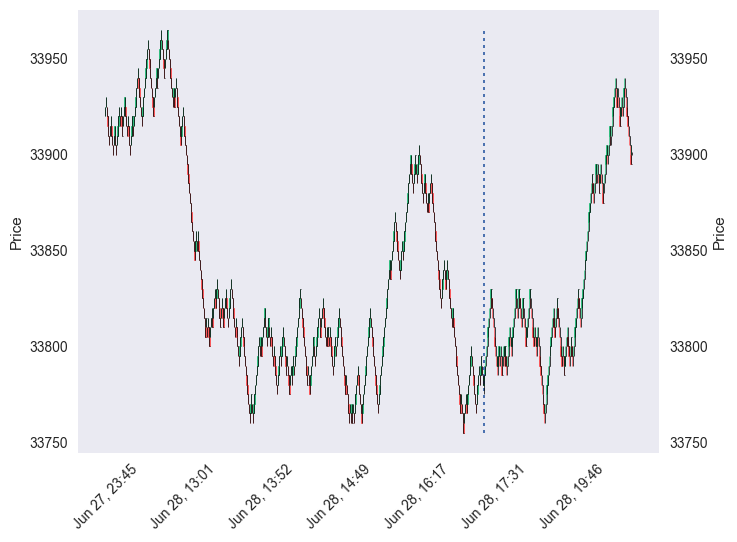

In [17]:
new_renko = df_renko.drop(differs)
differs = get_differences(df_orig, new_renko)[1]

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(new_renko, ax=ax1, type='candle', vlines=dict(vlines=differs, linestyle='dotted'), style='yahoo', warn_too_much_data=len(df_renko))

mpf.plot(df_orig, ax=ax2, type='ohlc', style='default', warn_too_much_data=len(df_renko))

mpf.show()

#### There is one!
Let's zoom in on this, as we are currently on jupyter notebook, a improvisation needs to be done, since *"ipympl + %matplotlib widget"* may not work for everyone.

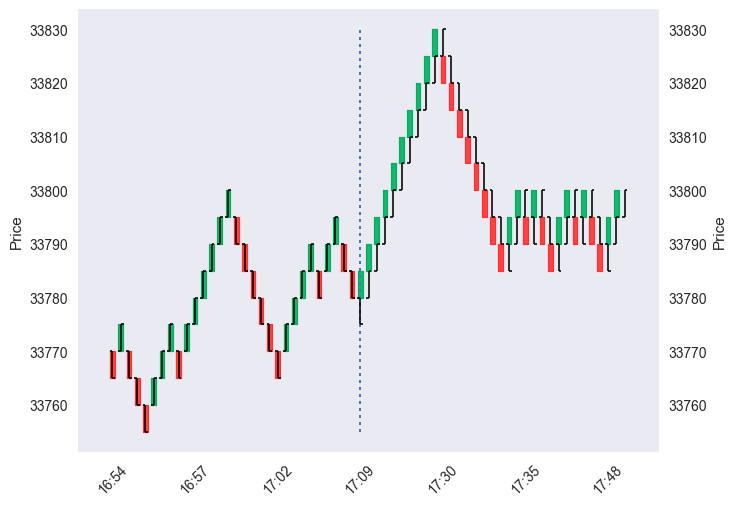

In [18]:
s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

diff_index = new_renko.index.get_loc(differs[0])

mpf.plot(new_renko.iloc[diff_index - 30 : diff_index + 32],
         ax=ax1, type='candle', vlines=dict(vlines=differs, linestyle='dotted'), style='yahoo',
         warn_too_much_data=len(df_renko))


diff_index = df_orig[df_orig.index >= differs[0]].head(1)
diff_index = df_orig.index.get_loc(diff_index.index[0])

mpf.plot(df_orig.iloc[diff_index - 33 : diff_index + 30],
         ax=ax2, type='ohlc', style='default',
         warn_too_much_data=len(df_orig))

mpf.show()

#### As you can see, the previous deletion ended up removing some important brick that wasn't exactly a difference.
Let's fix this

In [19]:
# where is it
differs
diff_index

[Timestamp('2023-06-28 17:11:09.214000')]

490

In [20]:
# originally 14 differs
differs = get_differences(df_orig, df_renko)[1]
for i in range(len(differs)):
    print(f"{i}: {differs[i]}")

0: 2023-06-28 13:45:15.218000
1: 2023-06-28 13:45:25.316000
2: 2023-06-28 14:06:09.917000
3: 2023-06-28 14:06:28.116000
4: 2023-06-28 14:29:10.016000
5: 2023-06-28 14:30:03.819000
6: 2023-06-28 17:10:03.916000
7: 2023-06-28 17:10:47.615000
8: 2023-06-28 17:12:36.816000
9: 2023-06-28 17:13:30.816000
10: 2023-06-28 17:24:26.814000
11: 2023-06-28 17:26:03.614000
12: 2023-06-28 17:57:44.923000
13: 2023-06-28 17:58:31.021000


#### The closest one is **2023-06-28** *17:10:47*

In [21]:
differs.remove(differs[7])

0

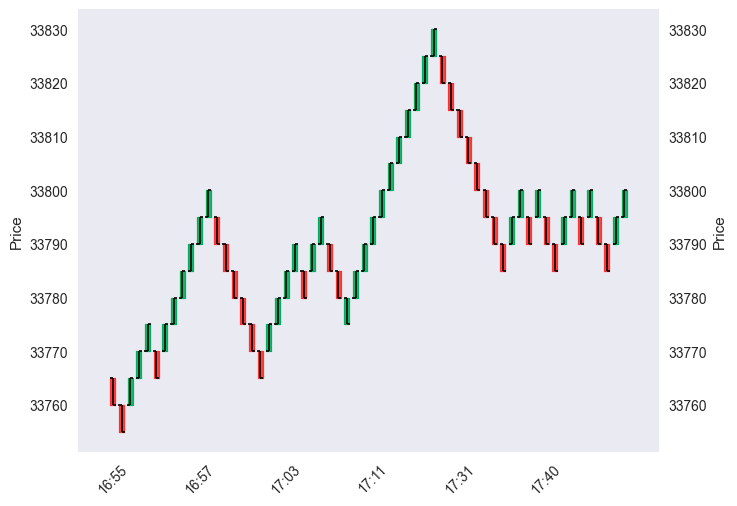

In [22]:
new_renko = df_renko.drop(differs)
differs = get_differences(df_orig, new_renko)[1]

abs(len(new_renko) - len(df_orig))

s = mpf.make_mpf_style(base_mpl_style='seaborn-v0_8', rc={'axes.grid': False})
fig = mpf.figure(style=s, figsize=(7.5, 5.75))
ax1 = fig.subplot()
ax2 = ax1.twinx()

mpf.plot(new_renko.iloc[490 - 30 : 490 + 30], ax=ax1, type='candle', vlines=dict(vlines=differs, linestyle='dotted'), style='yahoo', warn_too_much_data=len(df_renko))
mpf.plot(df_orig.iloc[490 - 30 : 490 + 30], ax=ax2, type='ohlc', style='default', warn_too_much_data=len(df_renko))

mpf.show()